In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown, display
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [2]:
def printmd(string):
    display(Markdown(string))

In [3]:
df = pd.read_csv("C:/Users/praty/OneDrive/my/Python data/adult.data.csv")

In [4]:
printmd(' # 1. Preliminary Data Analysis')

 # 1. Preliminary Data Analysis

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


In [6]:
df.shape


(32561, 15)

In [7]:
df = df.drop('fnlwgt', axis=1)

In [8]:
df = df.rename(columns={'salary': 'income'})
df = df.rename(columns={'sex': 'gender'})

In [9]:
printmd('### 1.1 Removing Misiing values')

### 1.1 Removing Misiing values

In [10]:
from numpy import nan
df = df.replace('?', nan)

In [11]:
pd.isnull(df).sum()

age                  0
workclass         1836
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
gender               0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [12]:
df.dropna(inplace= True)

In [13]:
df.head(10)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [14]:
printmd('### Data')

### Data

In [15]:
df.shape

(30162, 14)

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,30162.0,38.437902,13.134665,17.0,28.0,37.0,47.0,90.0
education-num,30162.0,10.121312,2.549995,1.0,9.0,10.0,13.0,16.0
capital-gain,30162.0,1092.007858,7406.346497,0.0,0.0,0.0,0.0,99999.0
capital-loss,30162.0,88.372489,404.298370,0.0,0.0,0.0,0.0,4356.0
hours-per-week,30162.0,40.931238,11.979984,1.0,40.0,40.0,45.0,99.0


In [17]:
df['income'].value_counts()

income
<=50K    22654
>50K      7508
Name: count, dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   education       30162 non-null  object
 3   education-num   30162 non-null  int64 
 4   marital-status  30162 non-null  object
 5   occupation      30162 non-null  object
 6   relationship    30162 non-null  object
 7   race            30162 non-null  object
 8   gender          30162 non-null  object
 9   capital-gain    30162 non-null  int64 
 10  capital-loss    30162 non-null  int64 
 11  hours-per-week  30162 non-null  int64 
 12  native-country  30162 non-null  object
 13  income          30162 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


In [19]:
printmd('# 2. Exploratory Data Analysis ')

# 2. Exploratory Data Analysis 

In [20]:
dataframe = df

<Axes: >

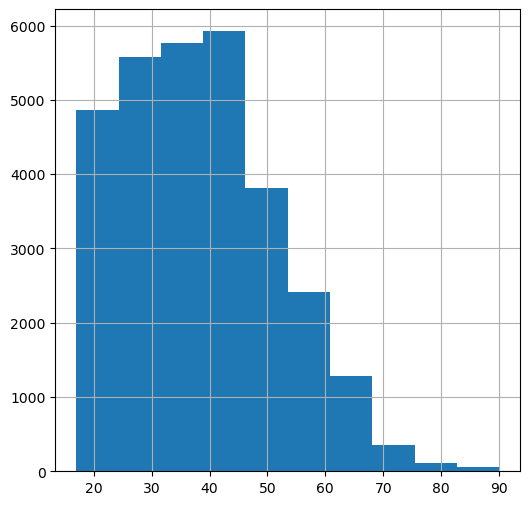

In [21]:
df['age'].hist(figsize = (6,6))


In [22]:
gender = round(pd.crosstab(df.gender, df.income).div(pd.crosstab(df.gender, df.income).apply(sum,1),0),2)
gender *=100
gender.sort_values(by = '>50K', inplace = True)
print(gender)

income  <=50K  >50K
gender             
Female   89.0  11.0
Male     69.0  31.0


## 2.1 Gender vs Income

Text(0, 0.5, 'Percentage of population')

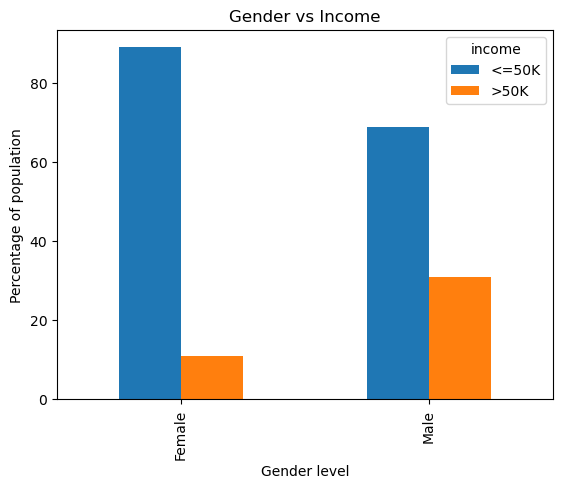

In [23]:
printmd('## 2.1 Gender vs Income')
ax = gender.plot(kind ='bar', title = 'Gender vs Income')
ax.set_xlabel('Gender level')
ax.set_ylabel('Percentage of population')

In [24]:
gender_workclass = round(pd.crosstab(df.workclass, [df.income, df.gender]).div(pd.crosstab(df.workclass, [df.income, df.gender]).apply(sum,1),0),2)
gender_workclass *= 100
print(gender_workclass)


income            <=50K         >50K      
gender           Female  Male Female  Male
workclass                                 
Federal-gov        27.0  34.0    6.0  33.0
Local-gov          33.0  38.0    7.0  22.0
Private            31.0  47.0    3.0  19.0
Self-emp-inc        8.0  36.0    4.0  52.0
Self-emp-not-inc   12.0  59.0    3.0  25.0
State-gov          33.0  40.0    5.0  22.0
Without-pay        36.0  64.0    0.0   0.0


## 2.2 Workclass vs Income

Text(24.000000000000014, 0.5, 'Percentage of population')

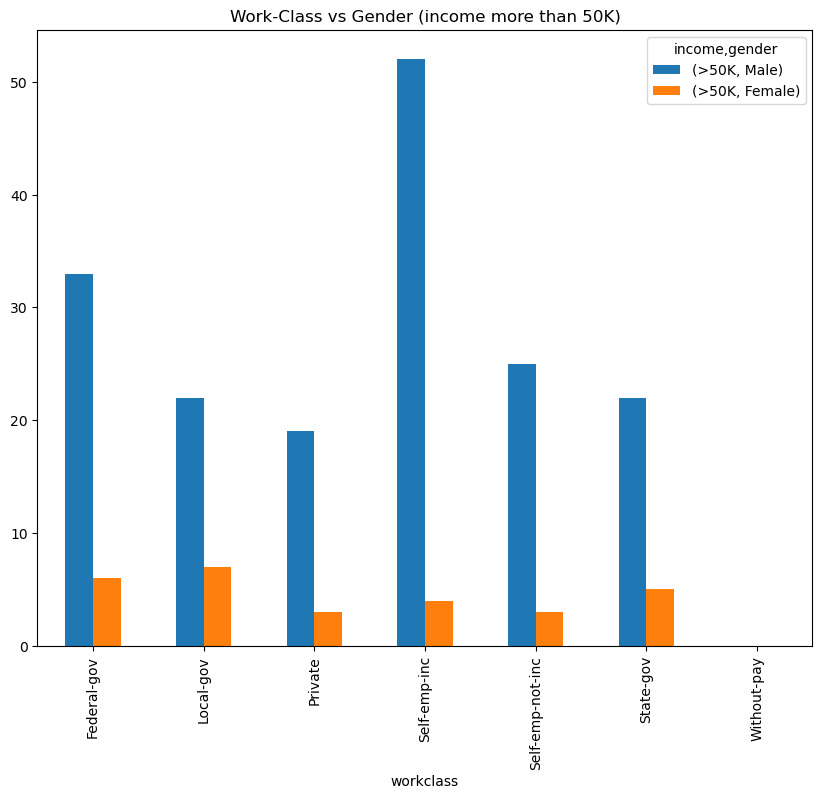

In [25]:
printmd('## 2.2 Workclass vs Income')
gender_workclass[[('>50K','Male'), ('>50K','Female')]].plot(kind = 'bar', title = 'Work-Class vs Gender (income more than 50K)', figsize = (10,8))
ax.set_xlabel('Gender level')
ax.set_ylabel('Percentage of population')



In [26]:
edu_level = {}
for x,y in df[['education-num','education']].drop_duplicates().itertuples(index=False):
    edu_level[y] = x

In [27]:
education = round(pd.crosstab(df.education, df.income).div(pd.crosstab(df.education, df.income).apply(sum,1),0),2)
education = education.reindex(sorted(edu_level, key=edu_level.get, reverse=False))
education *= 100
print(education)

income        <=50K  >50K
education                
Preschool     100.0   0.0
1st-4th        96.0   4.0
5th-6th        96.0   4.0
7th-8th        94.0   6.0
9th            95.0   5.0
10th           93.0   7.0
11th           94.0   6.0
12th           92.0   8.0
HS-grad        84.0  16.0
Some-college   80.0  20.0
Assoc-voc      74.0  26.0
Assoc-acdm     75.0  25.0
Bachelors      58.0  42.0
Masters        44.0  56.0
Prof-school    25.0  75.0
Doctorate      25.0  75.0


## 2.3 Education vs Income

Text(0, 0.5, 'Pergentage of population')

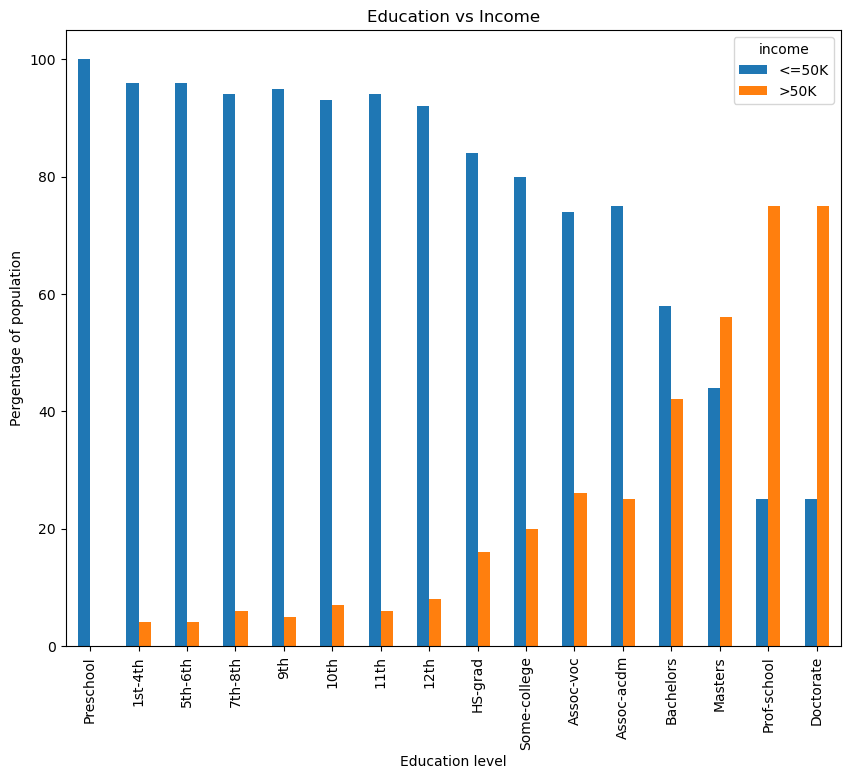

In [28]:
printmd('## 2.3 Education vs Income')
ax = education.plot(kind ='bar', title = 'Education vs Income', figsize = (10,8))
ax.set_xlabel('Education level')
ax.set_ylabel('Pergentage of population')

In [29]:
occupation = round(pd.crosstab(df.occupation, df.income).div(pd.crosstab(df.occupation, df.income).apply(sum,1),0),2)
occupation.sort_values(by = '>50K', inplace = True)
occupation *= 100
print(occupation)

income             <=50K  >50K
occupation                    
Priv-house-serv     99.0   1.0
Other-service       96.0   4.0
Handlers-cleaners   94.0   6.0
Armed-Forces        89.0  11.0
Farming-fishing     88.0  12.0
Machine-op-inspct   88.0  12.0
Adm-clerical        87.0  13.0
Transport-moving    80.0  20.0
Craft-repair        77.0  23.0
Sales               73.0  27.0
Tech-support        70.0  30.0
Protective-serv     67.0  33.0
Prof-specialty      55.0  45.0
Exec-managerial     51.0  49.0


## 2.4 Occupation vs Income

Text(0, 0.5, 'Percentage of population')

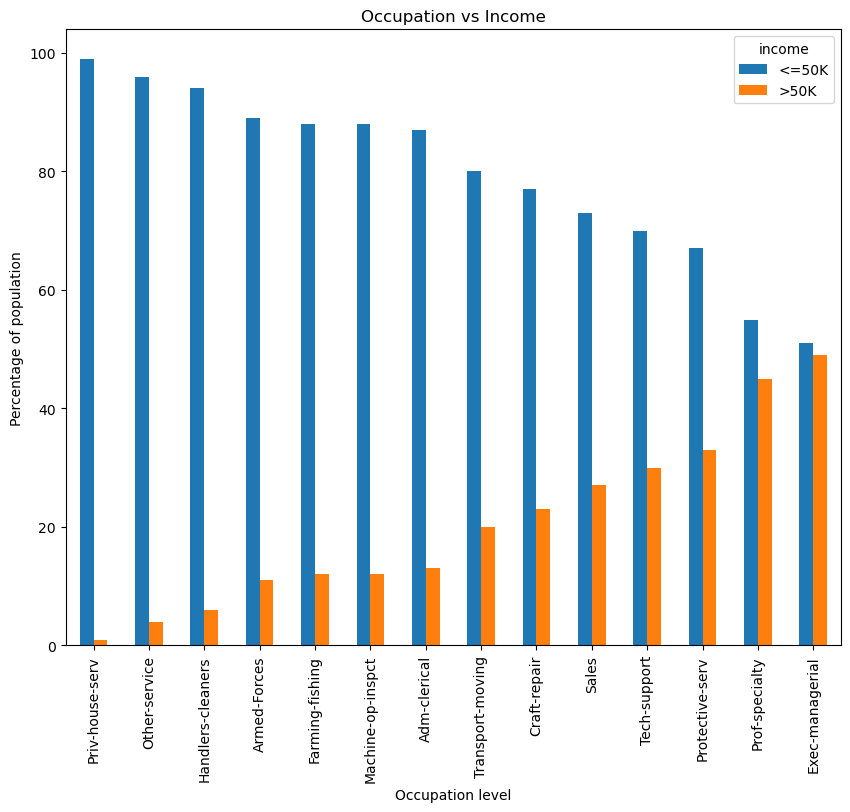

In [30]:
printmd('## 2.4 Occupation vs Income')
ax = occupation.plot(kind ='bar', title = 'Occupation vs Income', figsize = (10,8))
ax.set_xlabel('Occupation level')
ax.set_ylabel('Percentage of population')


In [31]:
native_country = round(pd.crosstab(df['native-country'], df.income).div(pd.crosstab(df['native-country'], df.income).apply(sum,1),0),2)
native_country.sort_values(by = '>50K', inplace = True)
native_country *= 100
print(native_country)

income                      <=50K  >50K
native-country                         
Outlying-US(Guam-USVI-etc)  100.0   0.0
Holand-Netherlands          100.0   0.0
Dominican-Republic           97.0   3.0
Columbia                     96.0   4.0
Mexico                       95.0   5.0
Guatemala                    95.0   5.0
Nicaragua                    94.0   6.0
Peru                         93.0   7.0
Honduras                     92.0   8.0
Vietnam                      92.0   8.0
El-Salvador                  91.0   9.0
Haiti                        90.0  10.0
Trinadad&Tobago              89.0  11.0
Puerto-Rico                  89.0  11.0
Jamaica                      88.0  12.0
Portugal                     88.0  12.0
Laos                         88.0  12.0
Ecuador                      85.0  15.0
Thailand                     82.0  18.0
Scotland                     82.0  18.0
Poland                       80.0  20.0
South                        80.0  20.0
Ireland                      79.0  21.0


## 2.5 Native Country

Text(0, 0.5, 'Percentage of population')

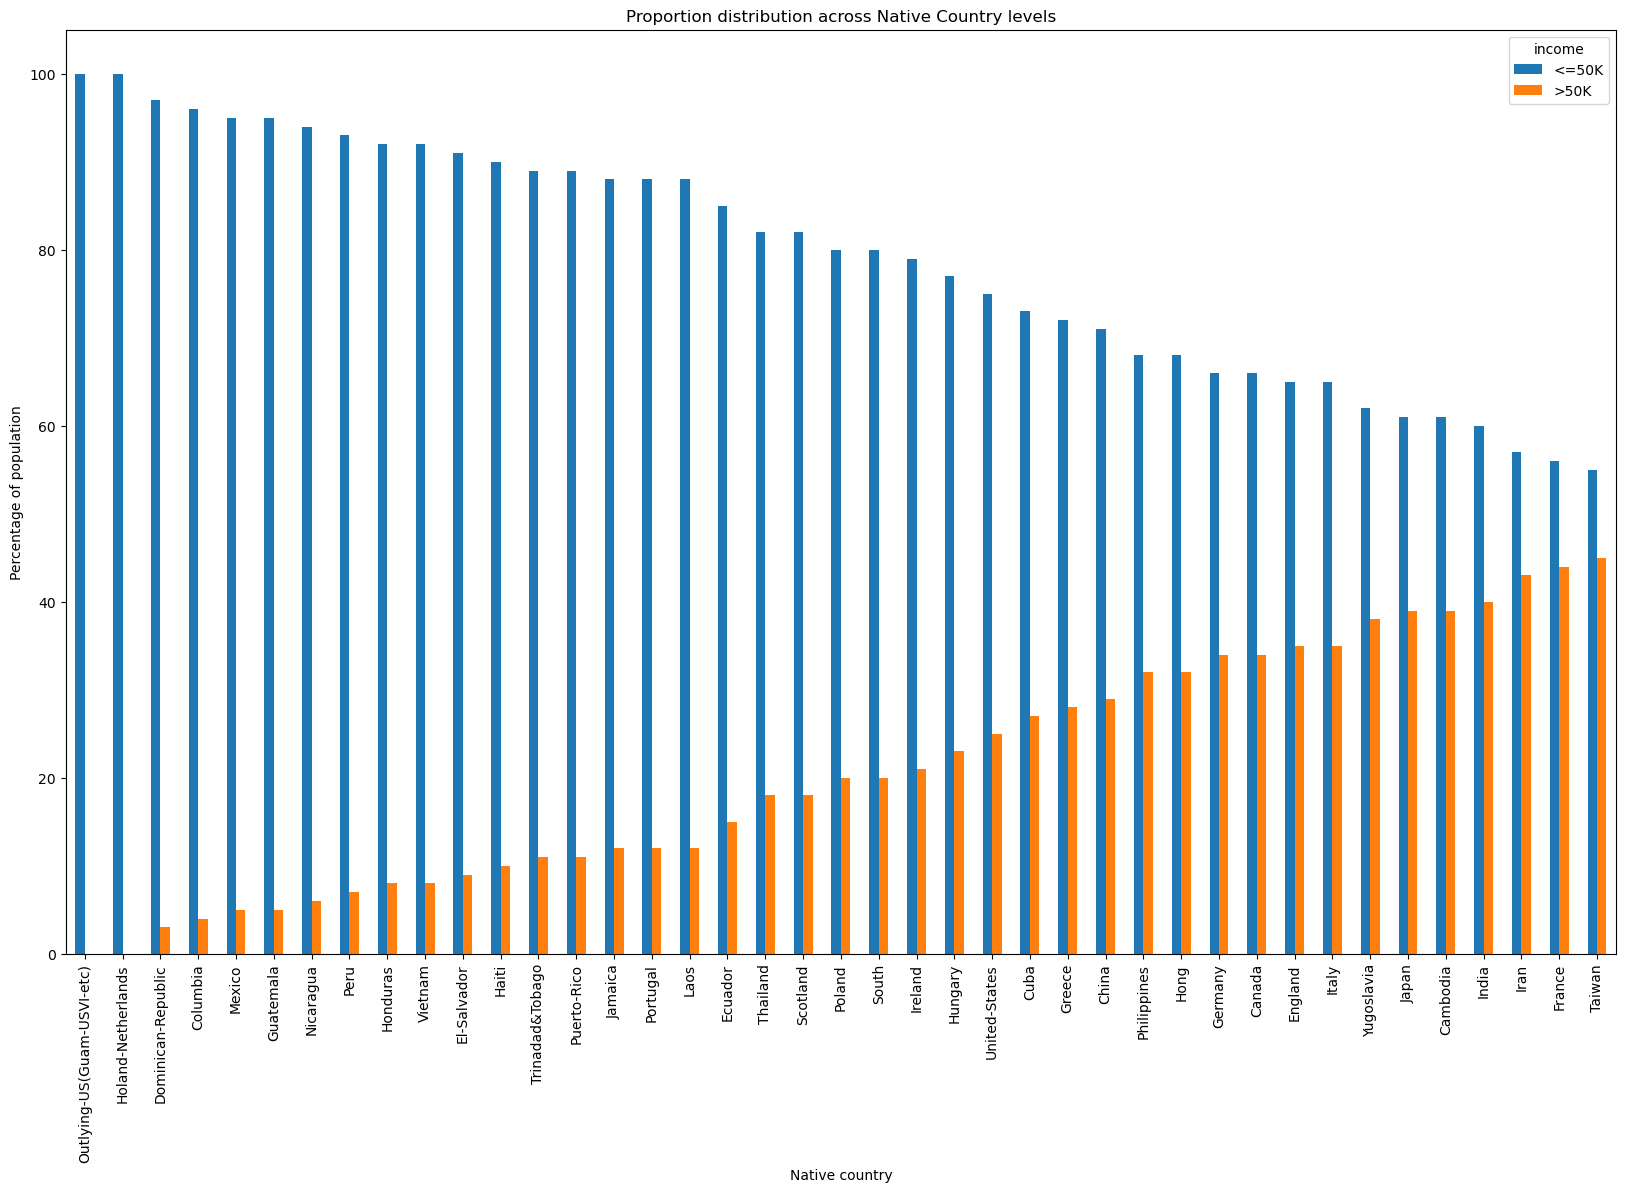

In [32]:
printmd('## 2.5 Native Country')
ax = native_country.plot(kind ='bar', title = 'Proportion distribution across Native Country levels', figsize = (20,12))
ax.set_xlabel('Native country')
ax.set_ylabel('Percentage of population')

In [33]:
hours = round(pd.crosstab(df['hours-per-week'], df.income).div(pd.crosstab(df['hours-per-week'], df.income).apply(sum,1),0),2) 
hours *= 100
print(hours)

income          <=50K  >50K
hours-per-week             
1                86.0  14.0
2                87.0  13.0
3                96.0   4.0
4                93.0   7.0
5                84.0  16.0
...               ...   ...
95               50.0  50.0
96               80.0  20.0
97               50.0  50.0
98               73.0  27.0
99               68.0  32.0

[94 rows x 2 columns]


### 2.6 Hours per week with categories

Text(0, 0.5, 'Percentage of population')

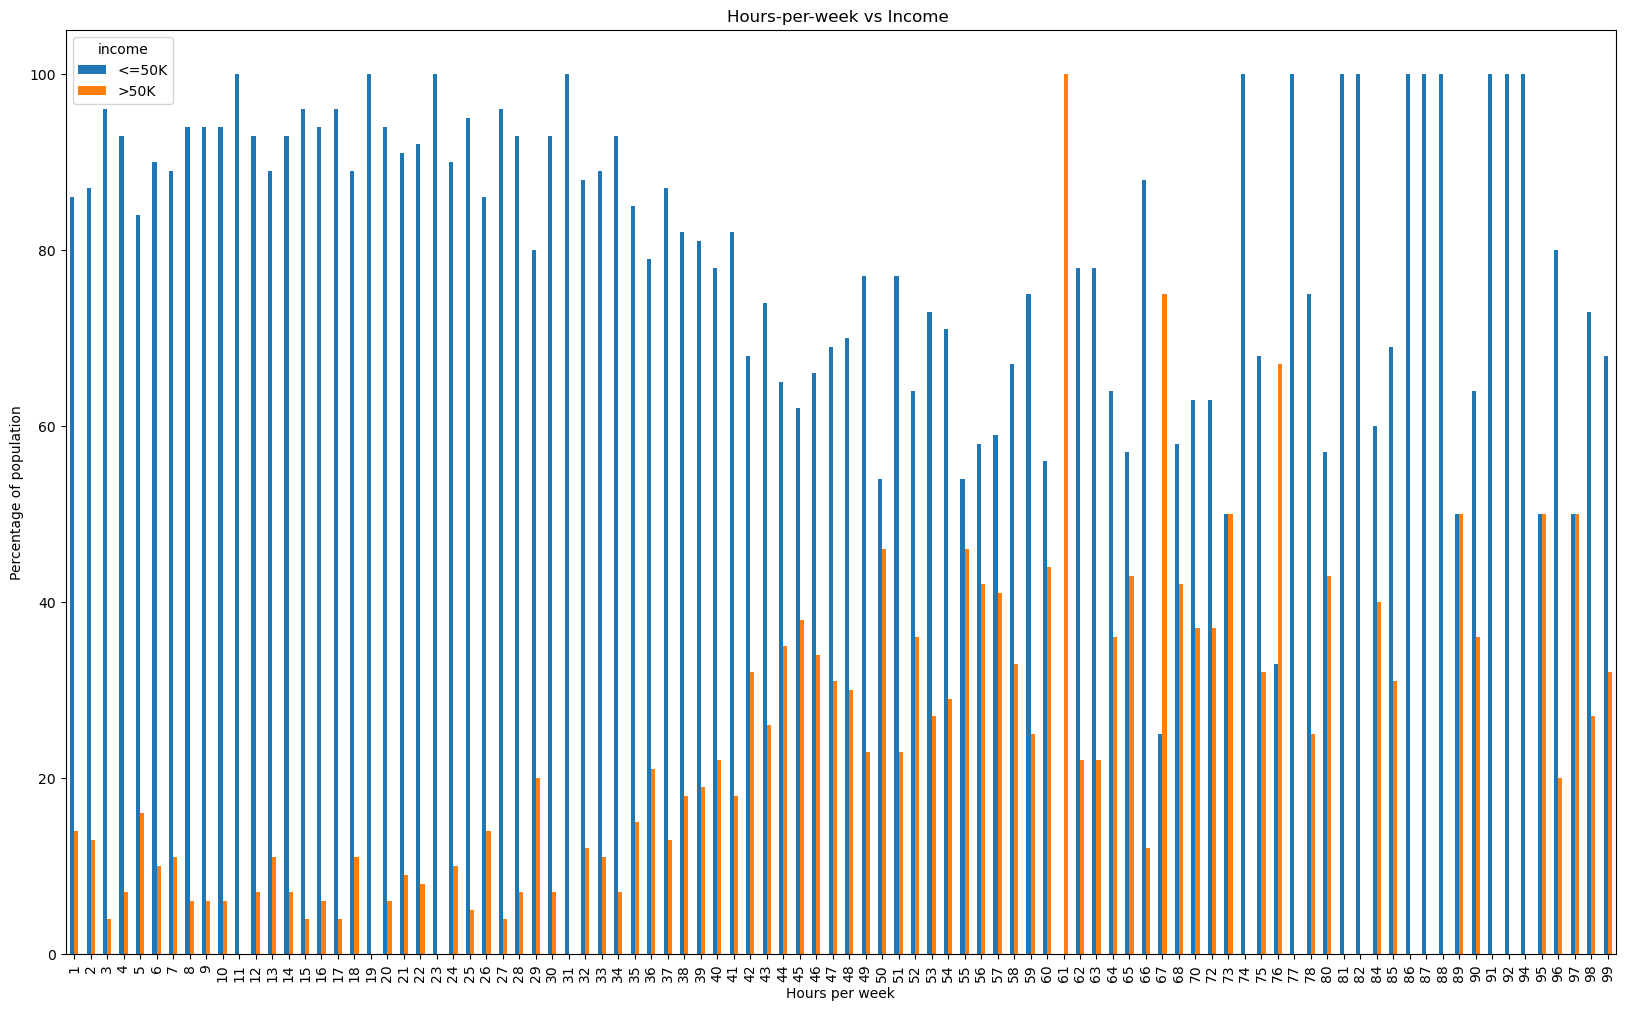

In [34]:
printmd('### 2.6 Hours per week with categories')
ax = hours.plot(kind ='bar', title = 'Hours-per-week vs Income ', figsize = (20,12))
ax.set_xlabel('Hours per week')
ax.set_ylabel('Percentage of population')

In [35]:
race = round(pd.crosstab(df.race, df.income).div(pd.crosstab(df.race, df.income).apply(sum,1),0),2)
race.sort_values(by = '>50K', inplace = True)
race *= 100
print(race)


income              <=50K  >50K
race                           
Other                91.0   9.0
Amer-Indian-Eskimo   88.0  12.0
Black                87.0  13.0
White                74.0  26.0
Asian-Pac-Islander   72.0  28.0


## 2.7 Race vs Income

Text(0, 0.5, 'Percentage of population')

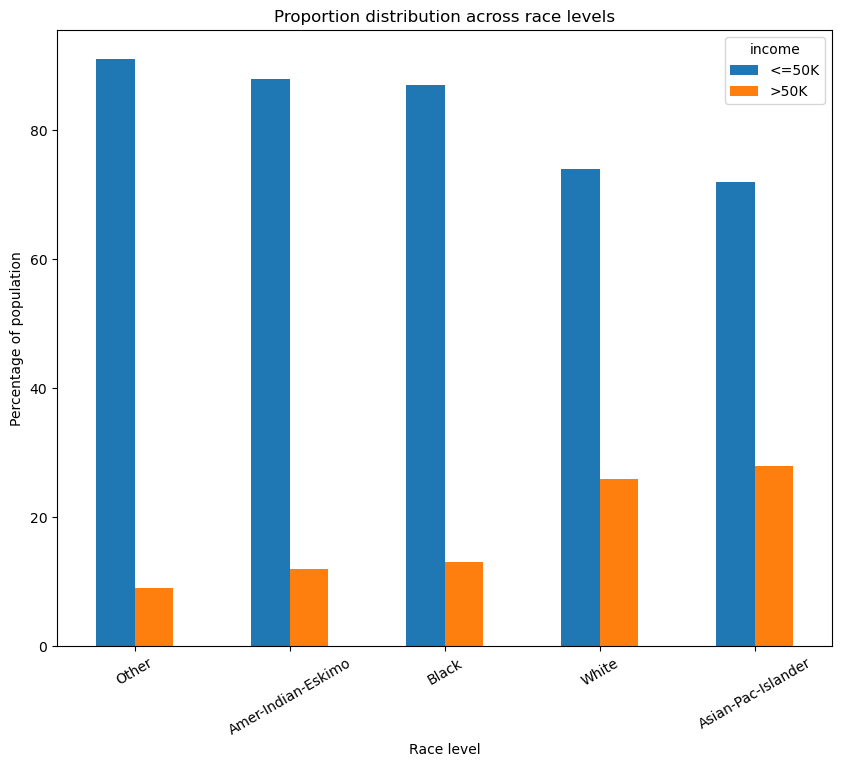

In [68]:
printmd('## 2.7 Race vs Income')
ax = race.plot(kind ='bar', title = 'Proportion distribution across race levels', figsize = (10,8), rot = 30)
ax.set_xlabel('Race level')
ax.set_ylabel('Percentage of population')


In [37]:
printmd('# One-Hot Coding ')

# One-Hot Coding 

In [38]:
df.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income'],
      dtype='object')

In [39]:
dataframe = pd.concat([dataframe.drop('occupation', axis=1), pd.get_dummies(dataframe.occupation, dtype=int).add_prefix('occupation_')],axis=1)
dataframe = pd.concat([dataframe.drop('workclass', axis=1), pd.get_dummies(dataframe.workclass, dtype=int).add_prefix('workclass_')],axis=1)
dataframe = dataframe.drop('education', axis=1)
dataframe = pd.concat([dataframe.drop('marital-status', axis=1), pd.get_dummies(dataframe['marital-status'], dtype=int).add_prefix('marital-status_')], axis=1)
dataframe = pd.concat([dataframe.drop('race', axis=1), pd.get_dummies(dataframe.race, dtype=int).add_prefix('race_')],axis=1)
dataframe = pd.concat([dataframe.drop('native-country', axis=1), pd.get_dummies(dataframe['native-country'], dtype=int).add_prefix('native-country_')],axis=1)
dataframe = pd.concat([dataframe.drop('relationship', axis=1), pd.get_dummies(dataframe.relationship, dtype=int).add_prefix('relationship_')],axis=1)

In [40]:
dataframe

,age,education-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,...,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,39,13,Male,2174,0,40,<=50K,1,0,0,...,0,1,0,0,0,1,0,0,0,0
1,50,13,Male,0,0,13,<=50K,0,0,0,...,0,1,0,0,1,0,0,0,0,0
2,38,9,Male,0,0,40,<=50K,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,53,7,Male,0,0,40,<=50K,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,28,13,Female,0,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,12,Female,0,0,38,<=50K,0,0,0,...,0,1,0,0,0,0,0,0,0,1
32557,40,9,Male,0,0,40,>50K,0,0,0,...,0,1,0,0,1,0,0,0,0,0
32558,58,9,Female,0,0,40,<=50K,1,0,0,...,0,1,0,0,0,0,0,0,1,0
32559,22,9,Male,0,0,20,<=50K,1,0,0,...,0,1,0,0,0,0,0,1,0,0


In [41]:
dataframe['gender']= dataframe['gender'].apply(lambda x: 1 if x == 'Male' else 0)
dataframe['income']= dataframe['income'].apply(lambda x: 1 if x == '>50K' else 0)

In [42]:
dataframe

,age,education-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,...,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,39,13,1,2174,0,40,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
1,50,13,1,0,0,13,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
2,38,9,1,0,0,40,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,53,7,1,0,0,40,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,28,13,0,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,12,0,0,0,38,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
32557,40,9,1,0,0,40,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
32558,58,9,0,0,0,40,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
32559,22,9,1,0,0,20,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0


In [69]:
printmd('# Correlation ')

# Correlation 

<Axes: >

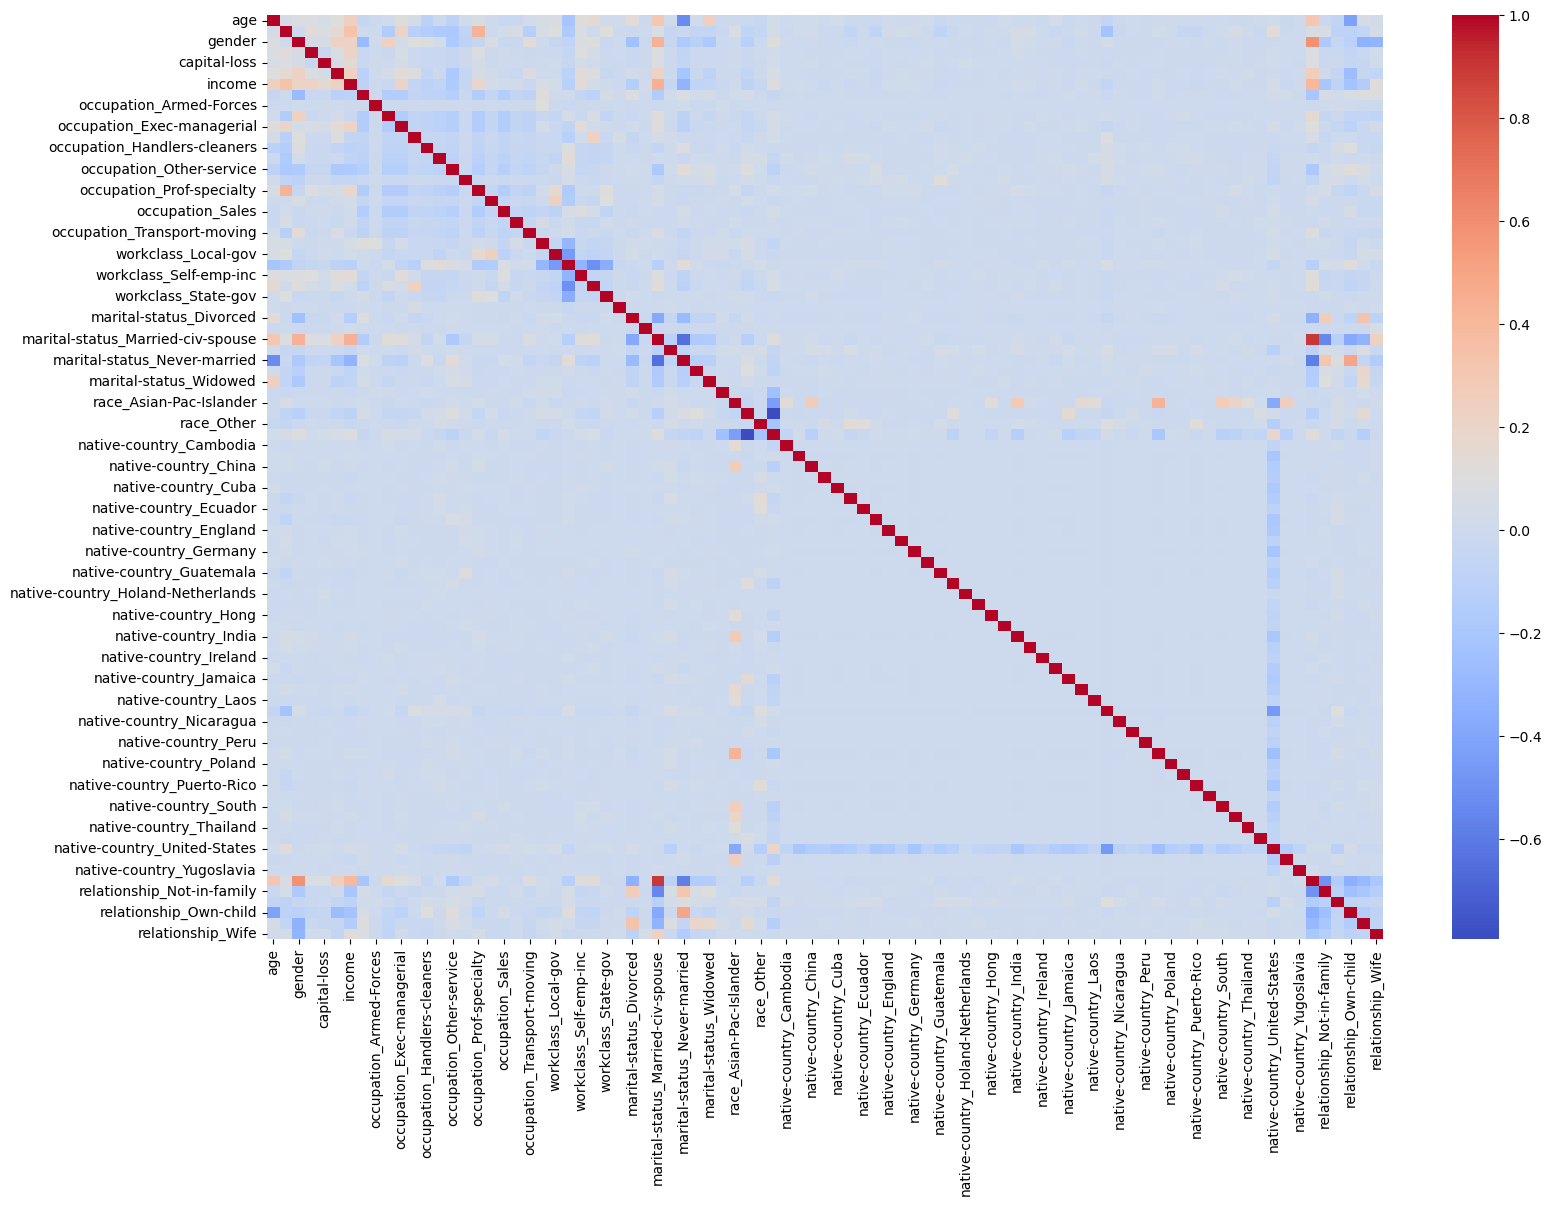

In [43]:
plt.figure(figsize=(18,12))
sns.heatmap(dataframe.corr(), annot=False, cmap='coolwarm')

In [44]:
dataframe.corr()

,age,education-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,...,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
age,1.000000,0.043526,0.081993,0.080154,0.060165,0.101599,0.241998,-0.040938,-0.010807,0.016109,...,0.007868,0.016259,-0.017775,0.000657,0.306718,-0.024017,-0.069314,-0.420621,0.049880,0.024574
education-num,0.043526,1.000000,0.006157,0.124416,0.079646,0.152522,0.335286,-0.001953,-0.000069,-0.154535,...,-0.017134,0.127207,-0.010953,-0.001661,0.073645,0.057331,-0.092853,-0.096893,-0.059207,0.033640
gender,0.081993,0.006157,1.000000,0.048814,0.047011,0.231268,0.216699,-0.281099,0.011969,0.227105,...,-0.012071,-0.003006,-0.001914,0.006733,0.581221,-0.172044,-0.040905,-0.102220,-0.326334,-0.318830
capital-gain,0.080154,0.124416,0.048814,1.000000,-0.032229,0.080432,0.221196,-0.030133,-0.002547,-0.023035,...,-0.003603,0.012375,-0.002493,-0.002317,0.079597,-0.026561,-0.020173,-0.052350,-0.028796,0.015593
capital-loss,0.060165,0.079646,0.047011,-0.032229,1.000000,0.052417,0.150053,-0.026338,0.005183,-0.001808,...,0.008849,0.015119,0.000344,-0.005036,0.077146,-0.018357,-0.014510,-0.050834,-0.040925,0.014981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
relationship_Not-in-family,-0.024017,0.057331,-0.172044,-0.026561,-0.018357,0.007420,-0.193258,0.045930,0.007453,-0.048283,...,0.001211,0.022734,-0.010554,-0.006922,-0.492427,1.000000,-0.102264,-0.244642,-0.202588,-0.129758
relationship_Other-relative,-0.069314,-0.092853,-0.040905,-0.020173,-0.014510,-0.051951,-0.084457,0.012116,0.019689,-0.011973,...,0.003768,-0.115246,0.038825,-0.004015,-0.146236,-0.102264,1.000000,-0.072651,-0.060162,-0.038534
relationship_Own-child,-0.420621,-0.096893,-0.102220,-0.052350,-0.050834,-0.263710,-0.226186,0.059622,-0.001798,-0.060281,...,-0.010187,0.037396,0.003091,-0.001496,-0.349835,-0.244642,-0.072651,1.000000,-0.143925,-0.092184
relationship_Unmarried,0.049880,-0.059207,-0.326334,-0.028796,-0.040925,-0.043210,-0.145799,0.109405,-0.005964,-0.058809,...,0.004767,-0.019316,0.005103,-0.007953,-0.289698,-0.202588,-0.060162,-0.143925,1.000000,-0.076337


In [45]:
corre= dataframe.corr()['income'].abs()
sorted_corre =corre.sort_values()
col_drop = int(0.8 * len(dataframe.columns))
c_drop = sorted_corre.iloc[:col_drop].index
daframe_dropped= dataframe.drop(c_drop, axis=1)

<Axes: >

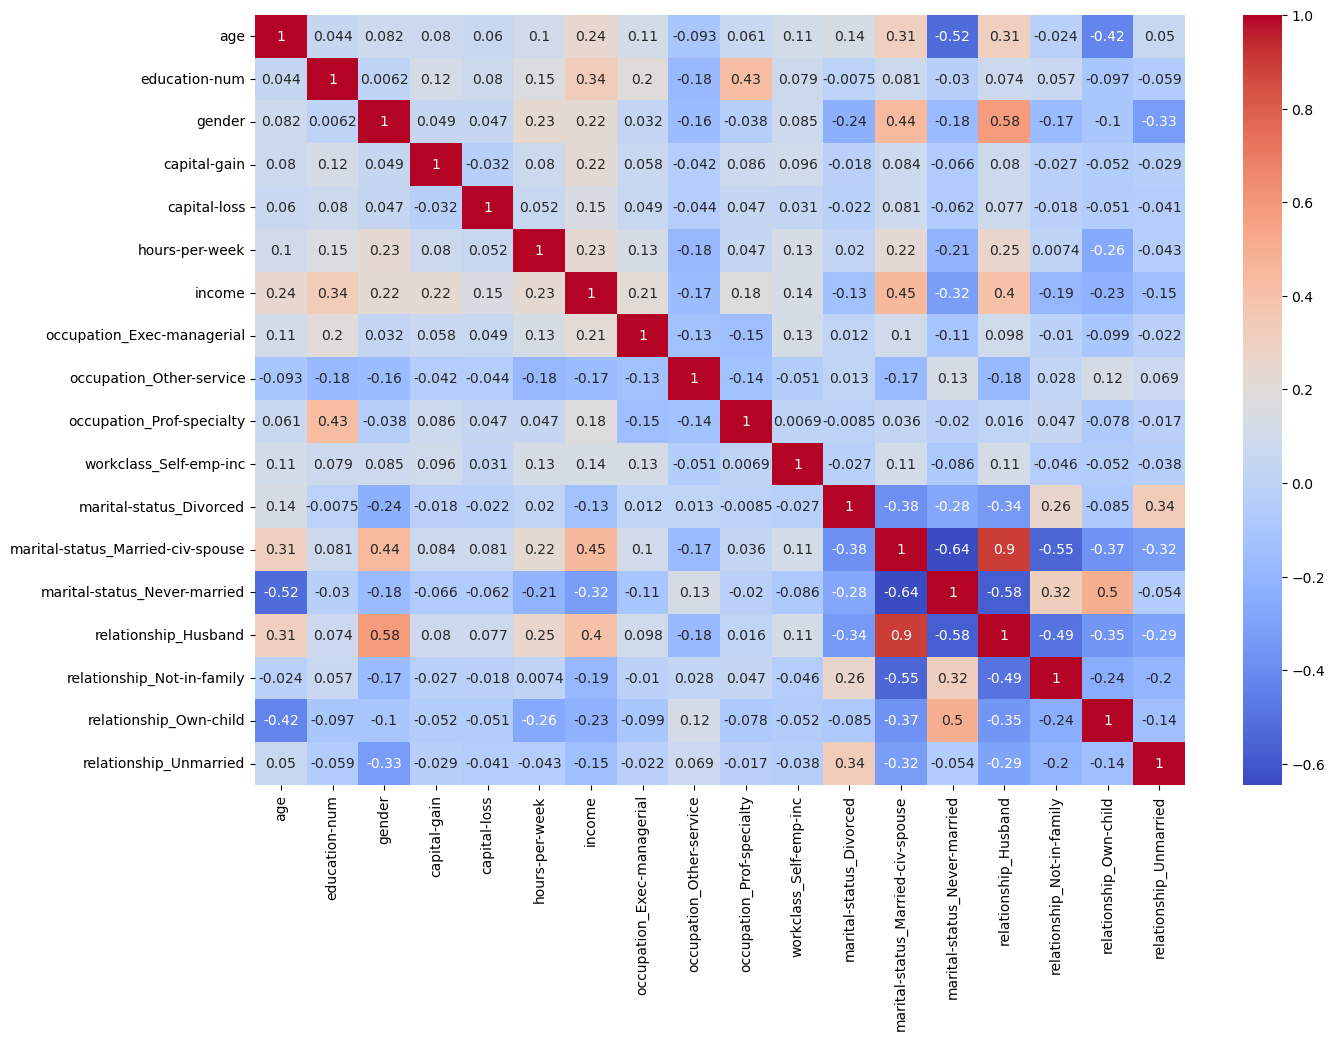

In [46]:
plt.figure(figsize=(15,10))
sns.heatmap(daframe_dropped.corr(), annot=True, cmap='coolwarm')


In [71]:
printmd('# 3. Data transformation  ')
printmd('## 3.1 Feature Selection  ')

# 3. Data transformation  

## 3.1 Feature Selection  

In [47]:
df = df.drop('capital-gain', axis=1)
df = df.drop('capital-loss', axis=1)
df = df.drop('relationship', axis=1)
df = df.drop('education-num',axis=1) 

In [48]:
df

,age,workclass,education,marital-status,occupation,race,gender,hours-per-week,native-country,income
0,39,State-gov,Bachelors,Never-married,Adm-clerical,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,White,Male,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Black,Female,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,White,Female,38,United-States,<=50K
32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,White,Male,40,United-States,>50K
32558,58,Private,HS-grad,Widowed,Adm-clerical,White,Female,40,United-States,<=50K
32559,22,Private,HS-grad,Never-married,Adm-clerical,White,Male,20,United-States,<=50K


In [49]:
columns = ['age', 'workclass', 'education', 'marital-status', 'occupation', 'race', 'gender', 'hours-per-week', 'native-country', 'income']
df.columns = columns

In [73]:
printmd('## 3.2 Label encoders')

## 3.2 Label encoders

In [50]:
label_encoders = {}
for column in df.select_dtypes(include='object').columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

In [51]:
df.head(5)

,age,workclass,education,marital-status,occupation,race,gender,hours-per-week,native-country,income
0,39,5,9,4,0,4,1,40,38,0
1,50,4,9,2,3,4,1,13,38,0
2,38,2,11,0,5,4,1,40,38,0
3,53,2,1,2,5,2,1,40,38,0
4,28,2,9,2,9,2,0,40,4,0


In [74]:
printmd('# 4. Model Development')

# 4. Model Development

In [52]:
X = df.drop('income', axis=1)
y = df['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
print(X_train.shape,X_test.shape)

(24129, 9) (6033, 9)


In [54]:
print(y_train.shape,y_test.shape)

(24129,) (6033,)


In [75]:
printmd('## 4.1 Logistic Regression')

## 4.1 Logistic Regression

In [87]:
lr = LogisticRegression()
lr.fit(X_train, y_train)


C:\Users\praty\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [88]:
lr_pred = lr.predict(X_test)

In [90]:
print("\nLogistic Regression Accuracy:", accuracy_score(y_test, lr_pred))
print("Logistic Regression Classification Report:")
print(classification_report(y_test,lr_pred))


Logistic Regression Accuracy: 0.7470578484999171
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.94      0.85      4503
           1       0.50      0.18      0.27      1530

    accuracy                           0.75      6033
   macro avg       0.64      0.56      0.56      6033
weighted avg       0.70      0.75      0.70      6033



In [76]:
printmd('## 4.2 K-Nearest Neighbours')

## 4.2 K-Nearest Neighbours

In [59]:
k_values =np.arange(1,11)
accuracy_scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    knn_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, knn_pred)
    accuracy_scores.append(accuracy)
    print(accuracy)

0.7616442897397646
0.7813691364163766
0.781700646444555
0.7913144372617271
0.7904856621912812
0.7924747223603514
0.7881650919940328
0.7924747223603514
0.7904856621912812
0.7909829272335488


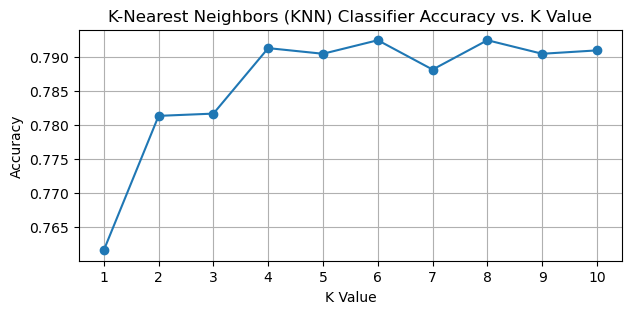

In [60]:
plt.figure(figsize=(7, 3))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-')
plt.title('K-Nearest Neighbors (KNN) Classifier Accuracy vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [77]:
printmd('## 4.3 Random Forest')

## 4.3 Random Forest

In [79]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print("\nRandom Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_pred))



Random Forest Accuracy: 0.8158461793469253
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      4503
           1       0.65      0.58      0.62      1530

    accuracy                           0.82      6033
   macro avg       0.76      0.74      0.75      6033
weighted avg       0.81      0.82      0.81      6033



In [78]:
printmd('## 4.4 Decisiion Tree')

## 4.4 Decisiion Tree

In [80]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
print("\nDecision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print("Decision Tree Classification Report:")
print(classification_report(y_test, dt_pred))



Decision Tree Accuracy: 0.7775567710923256
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      4503
           1       0.57      0.53      0.55      1530

    accuracy                           0.78      6033
   macro avg       0.70      0.70      0.70      6033
weighted avg       0.77      0.78      0.78      6033



In [92]:
printmd('## 4.5 Confusion Matrix')

## 4.5 Confusion Matrix

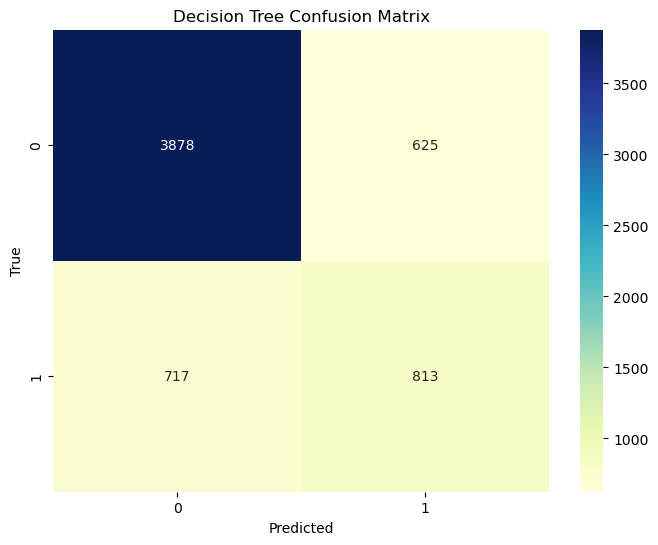

In [91]:
dt_cm = confusion_matrix(y_test, dt_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(dt_cm, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()